In [1]:
import numpy as np; import pandas as pd; import pyodbc; import datetime; import sklearn; import os; import math
from sklearn import feature_selection, linear_model, grid_search, cross_validation, metrics, ensemble, learning_curve 
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from datetime import datetime
from sklearn.cluster import KMeans
import pickle
import seaborn as sns
import xgboost as xgb
from sklearn.feature_selection import chi2, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
%pylab inline 
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from IPython.core.display import display,HTML
display(HTML("<style>.container{width:90% !important;}</style>"))

conn = pyodbc.connect(r'DRIVER={SQL Server Native Client 11.0};'r'SERVER=WIN-5G5AUOCEJPK;'r'DATABASE=Gold585;'r'Trusted_Connection=yes;')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#Отбираем ПОСЛЕДНИЕ залоговые билеты со статусом Новый залог за последний год
sql_query = "SELECT \
       [PartnerID] \
      ,[Sex] \
      ,[Age] \
      ,[QntPurchaseCode] \
      ,[SUMisPartnerPromotionID] \
      ,[AVGisPartnerPromotionID] \
      ,[SUMisCrossPromo] \
      ,[AVGisCrossPromo] \
      ,[SumQuantity] \
      ,[SumSumma] \
      ,[AVGSumma] \
      ,[SumSummaDiscount] \
      ,[AvgSummaDiscount] \
      ,[AVGProcentSkidki] \
      ,[AVGCostPrice] \
      ,[AVGGiftCardPositionID] \
      ,[SumGiftCardPositionID] \
      ,[AVGQntName] \
      ,[SumIsExpensive] \
      ,[AVGIsExpensive] \
      ,[SumIsCheap] \
      ,[AVGIsCheap] \
      ,[SumIsPremium] \
      ,[AVGIsPremium] \
      ,[SumIsMidle] \
      ,[AVGIsMidle] \
      ,[SumIsUnknownLevel] \
      ,[AVGIsUnknownLevel] \
      ,[SumIsGold] \
      ,[AVGIsGold] \
      ,[SumIsSilver] \
      ,[AVGIsSilver] \
      ,[SumIsNoMetal] \
      ,[AVGIsNoMetal] \
      ,[SumIsUnknownMetal] \
      ,[AVGIsUnknownMetal] \
  FROM [Gold585].[dbo].[RetailCommon]"
data = pd.read_sql(sql_query,conn)

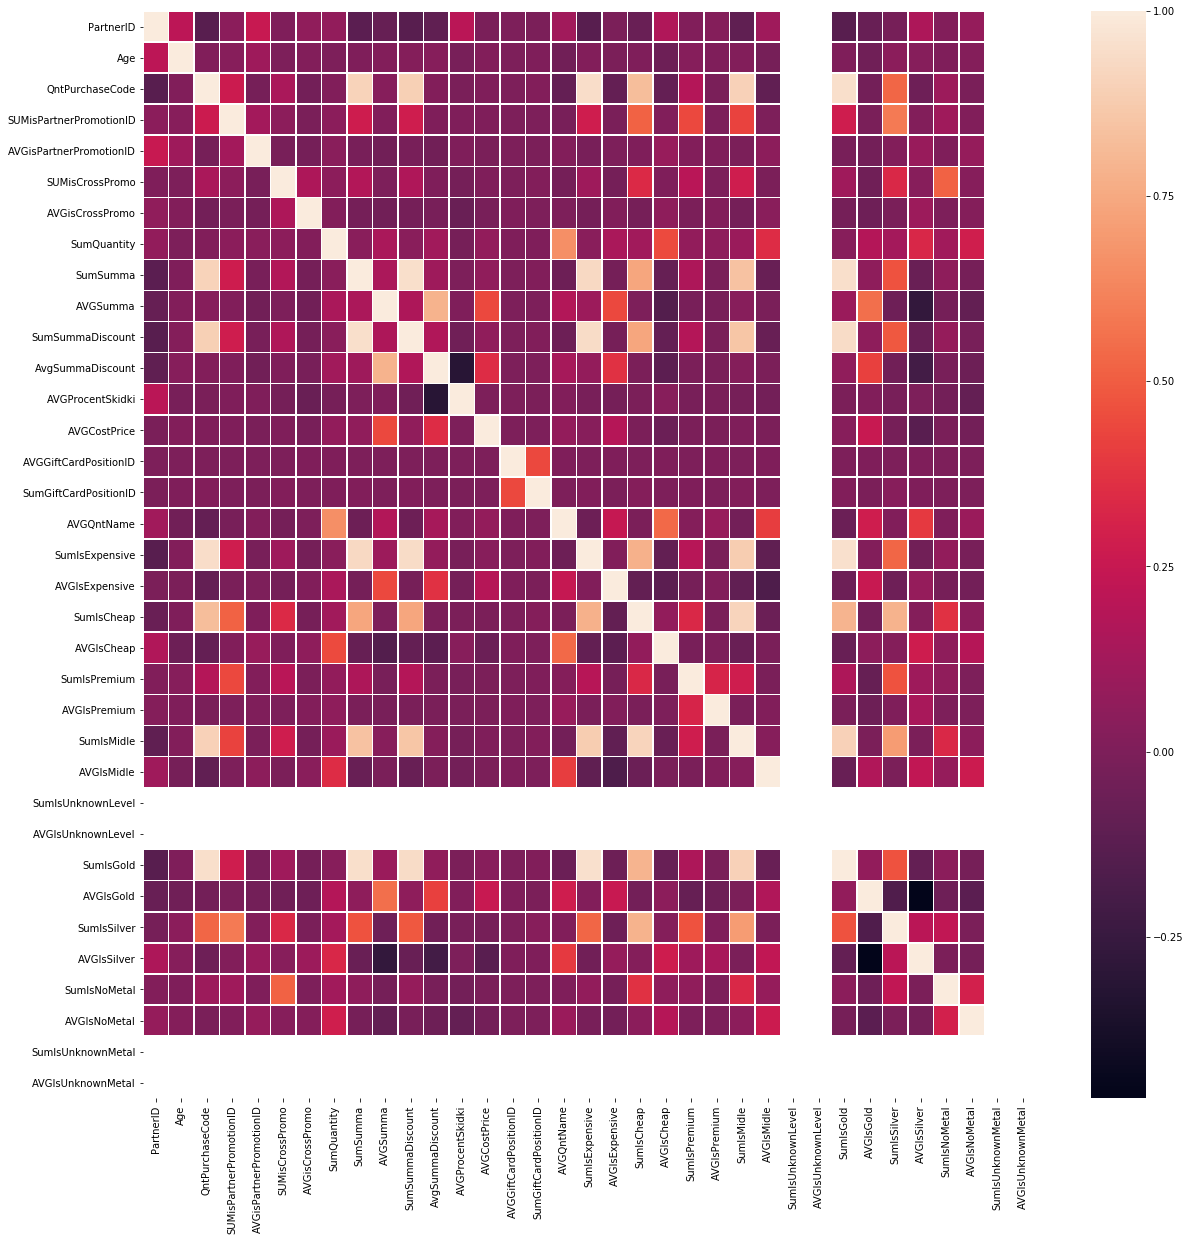

In [6]:
cormatrx=data.corr()
cormatrx
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(cormatrx,  linewidths=.5, ax=ax)

In [8]:
cormatrx.to_csv('corrmtx.csv')

In [3]:
#Отбираем ПОСЛЕДНИЕ залоговые билеты со статусом Новый залог за последний год
sql_query = "SELECT [PurchaseCode]\
      ,PartnerID \
      ,IIf([Sex]='M',1,IIf([Sex]='F',0,NULL)) Sex \
      ,[Age] \
      ,[QntPurchaseCode] \
      ,[SUMisPartnerPromotionID] \
      ,[SUMisCrossPromo] \
      ,[SUMSMS30] \
      ,[SUMSMS14] \
      ,[SumQuantity] \
      ,[SumSumma] \
      ,[AVGSumma] \
      ,[SumSummaDiscount] \
      ,[AvgSummaDiscount] \
      ,[AVGProcentSkidki] \
      ,[SumIsExpensive] \
      ,[AVGIsExpensive] \
      ,[SumIsCheap] \
      ,[AVGIsCheap] \
      ,[SumIsPremium] \
      ,[AVGIsPremium] \
      ,[SumIsMidle] \
      ,[AVGIsMidle] \
      ,[SumIsUnknownLevel] \
      ,[AVGIsUnknownLevel] \
      ,[SumIsGold] \
      ,[AVGIsGold] \
      ,[SumIsSilver] \
      ,[AVGIsSilver] \
      ,[SumIsNoMetal] \
      ,[AVGIsNoMetal] \
  FROM [Gold585].[dbo].[RetailCommon] a\
  Where convert(datetime,[PurchaseDate]) > convert(datetime,'2017-01-01') \
  and PurchaseDateTime = (Select MAX(convert(datetime,PurchaseDateTime)) From RetailCommon b where a.PartnerID = b.PartnerID)"
data = pd.read_sql(sql_query,conn)

In [3]:
#
sql_query = "SELECT [PurchaseCode]\
      ,PartnerID \
      ,IIf([Sex]='M',1,IIf([Sex]='F',0,NULL)) Sex \
      ,[Age] \
      ,[QntPurchaseCode] \
      ,[SUMisPartnerPromotionID] \
      ,[SUMisCrossPromo] \
      ,[SUMSMS30] \
      ,[SUMSMS14] \
      ,[SumQuantity] \
      ,[AVGSumma] \
      ,[AvgSummaDiscount] \
      ,[AVGProcentSkidki] \
      ,[SumIsExpensive] \
      ,[AVGIsExpensive] \
      ,[SumIsCheap] \
      ,[AVGIsCheap] \
      ,[SumIsPremium] \
      ,[AVGIsPremium] \
      ,[SumIsMidle] \
      ,[AVGIsMidle] \
      ,[SumIsGold] \
      ,[AVGIsGold] \
      ,[SumIsSilver] \
      ,[AVGIsSilver] \
      ,[SumIsNoMetal] \
      ,[AVGIsNoMetal] \
  FROM [Gold585].[dbo].[RetailCommon] a\
  Where convert(datetime,[PurchaseDate]) > convert(datetime,'2017-01-01') \
  and PurchaseDateTime = (Select MAX(convert(datetime,PurchaseDateTime)) From RetailCommon b where a.PartnerID = b.PartnerID)"
data = pd.read_sql(sql_query,conn)

In [11]:
data.shape

(1617442, 29)

In [12]:
data.head()

,PurchaseCode,PartnerID,Sex,Age,QntPurchaseCode,SUMisPartnerPromotionID,SUMisCrossPromo,SUMSMS30,SUMSMS14,SumQuantity,...,SumIsMidle,AVGIsMidle,SumIsUnknownLevel,AVGIsUnknownLevel,SumIsGold,AVGIsGold,SumIsSilver,AVGIsSilver,SumIsNoMetal,AVGIsNoMetal
0,1166788529,4566120,0.0,44,1,0,1,0,0,1.0,...,0,0,0,0,0,0,1,1,0,0
1,1166790029,4565654,1.0,23,1,0,0,0,0,1.0,...,0,0,0,0,1,1,0,0,0,0
2,1166790473,847677,0.0,36,3,0,1,0,0,1.0,...,3,1,0,0,2,0,4,1,0,0
3,1166794078,4261317,1.0,37,1,0,0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1166794516,4563316,0.0,79,1,1,0,0,0,1.0,...,1,1,0,0,0,0,0,0,1,1


In [13]:
data[data['PartnerID']==3831021]

,PurchaseCode,PartnerID,Sex,Age,QntPurchaseCode,SUMisPartnerPromotionID,SUMisCrossPromo,SUMSMS30,SUMSMS14,SumQuantity,...,SumIsMidle,AVGIsMidle,SumIsUnknownLevel,AVGIsUnknownLevel,SumIsGold,AVGIsGold,SumIsSilver,AVGIsSilver,SumIsNoMetal,AVGIsNoMetal
456172,1184026189,3831021,0.0,59,3,0,0,0,0,1.0,...,0,0,0,0,3,1,0,0,0,0


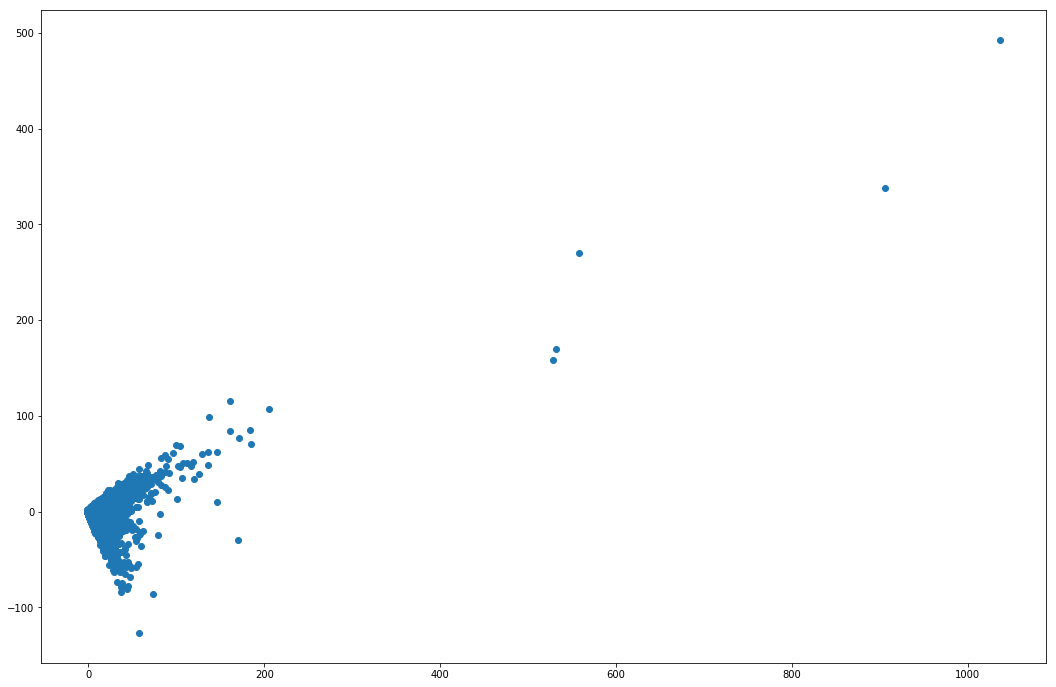

In [14]:
df = data.fillna(0)
target=df.drop(['PurchaseCode','PartnerID'], axis=1)
#target = pd.get_dummies(target, columns = ['Sex','CreditCondition'])
X = StandardScaler().fit_transform(target)

from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2) #HOW MANY AXIS DO WE WANT
pca.fit_transform(X)
targert2 = pca.transform(X)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 12

plt.scatter(targert2[:, 0], targert2[:, 1])

In [15]:
datetime.datetime.now()

datetime.datetime(2018, 9, 7, 18, 29, 52, 747789)

In [ ]:
now = datetime.datetime.now()
print(now)
X1 = pd.DataFrame(X).sample(100000)

# с процентами новых и ОСН
from sklearn.metrics import silhouette_score
mas = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1,n_jobs=-1).fit(X1)
    labels = kmeans.predict(X1)
    #a= silhouette_samples_memory_saving(X1, kmeans.labels_)
    a= silhouette_score(X1, kmeans.labels_)
    mas.append(a)
    print(a)

plt.plot(range(2, 11), mas, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

print(now + datetime.datetime.now())
# Оптимальное количество кластеров 8

2018-09-07 17:26:29.759328


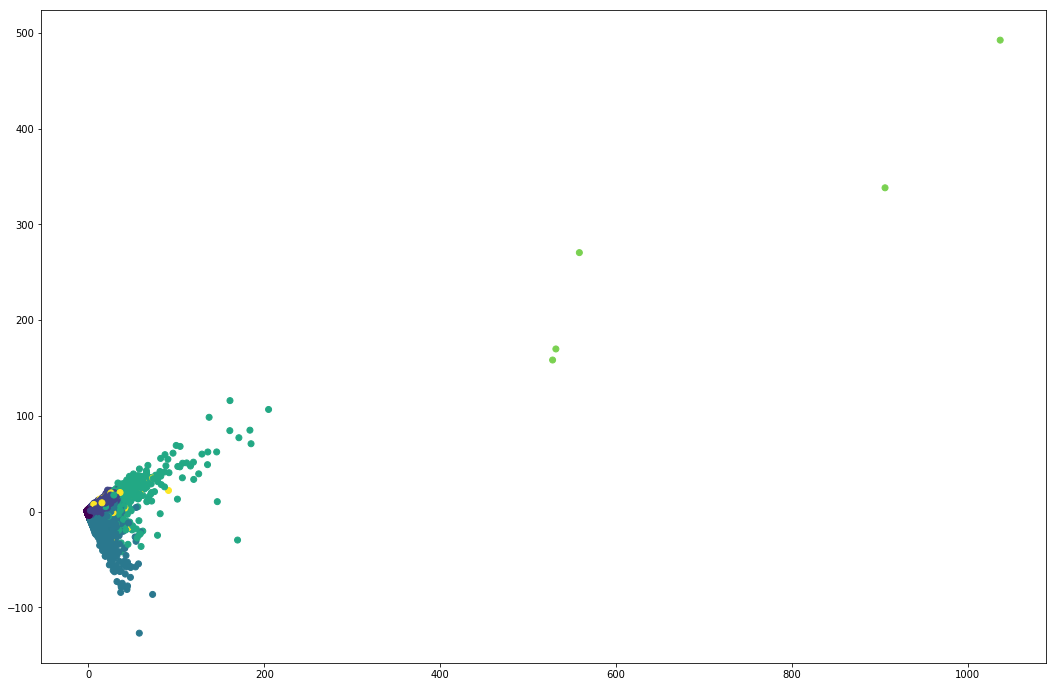

In [16]:
kmeans = KMeans(n_clusters= 6, random_state=1,n_jobs=-1).fit(X)
labels = kmeans.predict(X)
df['labels']=pd.DataFrame(labels)

targert2 = pd.DataFrame(targert2,columns=('X','Y'))
targert2['L'] = pd.DataFrame(labels)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 12

plt.scatter(targert2['X'], targert2['Y'],c =labels)

In [17]:
print(df.shape[0])
print(df[df['labels']==0].shape[0])
print(df[df['labels']==1].shape[0])
print(df[df['labels']==2].shape[0])
print(df[df['labels']==3].shape[0])
print(df[df['labels']==4].shape[0])
print(df[df['labels']==5].shape[0])

1617442
1473921
116748
23685
2377
5
706


In [19]:
pd.concat([df[df['labels']==0].describe().T['50%'],df[df['labels']==0].describe().T['mean'],df[df['labels']==0].describe().T['std'], \
           df[df['labels']==1].describe().T['50%'],df[df['labels']==1].describe().T['mean'],df[df['labels']==1].describe().T['std'], \
           df[df['labels']==2].describe().T['50%'],df[df['labels']==2].describe().T['mean'],df[df['labels']==2].describe().T['std'], \
           df[df['labels']==3].describe().T['50%'],df[df['labels']==3].describe().T['mean'],df[df['labels']==3].describe().T['std'], \
           df[df['labels']==4].describe().T['50%'],df[df['labels']==4].describe().T['mean'],df[df['labels']==4].describe().T['std'], \
           df[df['labels']==5].describe().T['50%'],df[df['labels']==5].describe().T['mean'],df[df['labels']==5].describe().T['std'], \
 #          df[df['labels']==6].describe().T['50%'],df[df['labels']==6].describe().T['mean'],df[df['labels']==6].describe().T['std'], \
 #          df[df['labels']==7].describe().T['50%'],df[df['labels']==7].describe().T['mean'],df[df['labels']==7].describe().T['std'], \
 #          df[df['labels']==8].describe().T['50%'],df[df['labels']==8].describe().T['mean'],df[df['labels']==8].describe().T['std'], \
 #          df[df['labels']==9].describe().T['50%'],df[df['labels']==9].describe().T['mean'],df[df['labels']==9].describe().T['std'], \
           ],axis=1).to_csv('Client-last-Purch AVG-from 2017.xlsx')

In [20]:
df[df['labels']==4]

,PurchaseCode,PartnerID,Sex,Age,QntPurchaseCode,SUMisPartnerPromotionID,SUMisCrossPromo,SUMSMS30,SUMSMS14,SumQuantity,...,AVGIsMidle,SumIsUnknownLevel,AVGIsUnknownLevel,SumIsGold,AVGIsGold,SumIsSilver,AVGIsSilver,SumIsNoMetal,AVGIsNoMetal,labels
982396,1202847493,2377429,0.0,0,409,0,0,399,399,9.0,...,5,0,0,3415,8,2414,5,1,0,4
1022005,1198824994,5319346,0.0,67,542,542,0,445,444,4.0,...,4,0,0,2901,5,2723,5,0,0,4
1114227,1201040800,5283999,1.0,51,294,281,0,274,265,32.0,...,4,0,0,1354,4,1397,4,306,1,4
1292769,1212129462,1494590,0.0,36,131,66,22,48,45,16.0,...,18,0,0,2411,18,2514,19,48,0,4
1499811,1217186965,5339367,1.0,37,117,114,0,116,103,1.0,...,14,0,0,2456,20,1561,13,167,1,4
